## Simple href link extraction from webpage
(has limitations)

In [34]:
from bs4 import BeautifulSoup

import requests

# url = raw_input("Enter a website to extract the URL's from: ")

# url = "www.kla-tencor.com"
# url = "www.pythonforbeginners.com"
url = "www.towshif.com"

r  = requests.get("http://" +url)

data = r.text

soup = BeautifulSoup(data)

for link in soup.find_all('a'):
    print(link.get('href'))

http://nginx.org/
http://nginx.com/


## Simple text extraction from visible components of html

In [36]:
import re
import urllib.request
from bs4 import BeautifulSoup
 
# html = urllib.request.urlopen('http://bgr.com/2014/10/15/google-android-5-0-lollipop-release/')

# html = urllib.request.urlopen('https://www.kla-tencor.com')
# html = urllib.request.urlopen('https://google.com')
html = urllib.request.urlopen('https://towshif.com')



soup = BeautifulSoup(html)
data = soup.findAll(text=True)
 
def visible(element):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True
 
result = filter(visible, data)

rlist = list(result)

rlist.remove('.')
# rlist.remove('\n')

print (rlist)

['\n', '\n', '\n', "Welcome to Towshif's nginx server!", '\n', 'If you see this page, the nginx web server is successfully installed and\nworking. Further configuration is required.', '\n', 'For online documentation and support please refer to\n', 'nginx.org', '\nCommercial support is available at\n', 'nginx.com', '.', '\n', 'Thank you for using nginx.', '\n', '\n']


## Best Implementation w/ BeautifulSoup, requests

In [39]:
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request


def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

html = urllib.request.urlopen('http://www.nytimes.com/2009/12/21/us/21storm.html').read()
text = text_from_html(html)
print(text)

             NYTimes.com no longer supports Internet Explorer 9 or earlier. Please upgrade your browser.  LEARN MORE »           Sections   Home   Search  Skip to content  Skip to navigation  View mobile version      The New York Times       U.S. | Storm Finally Exits a Snow-Covered East Coast          Search   Subscribe Now  Log In  0  Settings      Close search   Site Search Navigation     Search NYTimes.com     Clear this text input     Go             Loading...      See next articles       See previous articles           Site Navigation    Site Mobile Navigation       Advertisement          Supported by     U.S.   Storm Finally Exits a Snow-Covered East Coast   By JOSEPH BERGER DEC. 20, 2009     Continue reading the main story  Share This Page   Continue reading the main story     See how this article appeared when it was originally published on NYTimes.com         Photo        David Hom dug out the first of several cars covered with snow in front of his home in Sea Cliff, N.Y., on

## Adding Word Cloud Processing on the above text 

In [45]:
%matplotlib inline 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk

['no', 'longer', 'supports', 'internet', 'explorer', 'or', 'earlier', 'please', 'upgrade', 'your', 'browser', 'learn', 'more', 'sections', 'home', 'search', 'skip', 'to', 'content', 'skip', 'to', 'navigation', 'view', 'mobile', 'version', 'the', 'new', 'york', 'times', 'storm', 'finally', 'exits', 'east', 'coast', 'search', 'subscribe', 'now', 'log', 'in', 'settings', 'close', 'search', 'site', 'search', 'navigation', 'search', 'clear', 'this', 'text', 'input', 'go', 'loading', 'see', 'next', 'articles', 'see', 'previous', 'articles', 'site', 'navigation', 'site', 'mobile', 'navigation', 'advertisement', 'supported', 'by', 'storm', 'finally', 'exits', 'east', 'coast', 'by', 'joseph', 'berger', 'continue', 'reading', 'the', 'main', 'story', 'share', 'this', 'page', 'continue', 'reading', 'the', 'main', 'story', 'see', 'how', 'this', 'article', 'appeared', 'when', 'it', 'was', 'originally', 'published', 'on', 'photo', 'david', 'hom', 'dug', 'out', 'the', 'first', 'of', 'several', 'cars',

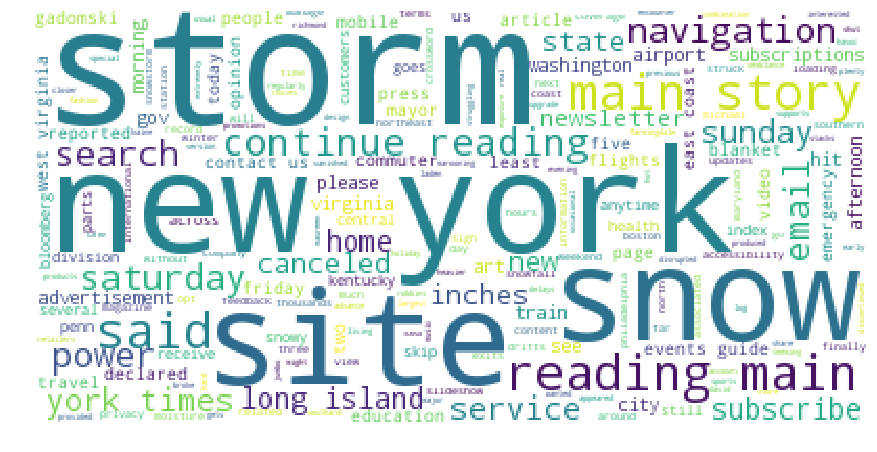

In [47]:
# actual code for wordcloud 
cleaned = nltk.word_tokenize(text.lower())
wordlist = [x for x in cleaned if (len(x)>=2 and x.isalpha())]
# print (wordlist)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(" ".join(wordlist))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## below you will see 'function' 'return' and 'var' highlighted since the incoming text contains javascript from the html source 
## we need to clean that